In [6]:
import sys,os
import pathlib
from sarpy.io.complex.converter import open_complex

sicd_path = pathlib.Path("E:/Synspective/IMG-VV-STRIXB-20220811T004713Z-SMSLC-SICD.nitf")

reader = open_complex(str(sicd_path))
print('image size as tuple ={}'.format(reader.get_data_size_as_tuple()))

#slc = reader[:]
#print(slc.dtype, slc.shape)

image size as tuple =((4388, 36699),)


In [7]:
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sarpy.visualization.remap import Density
import numpy as np

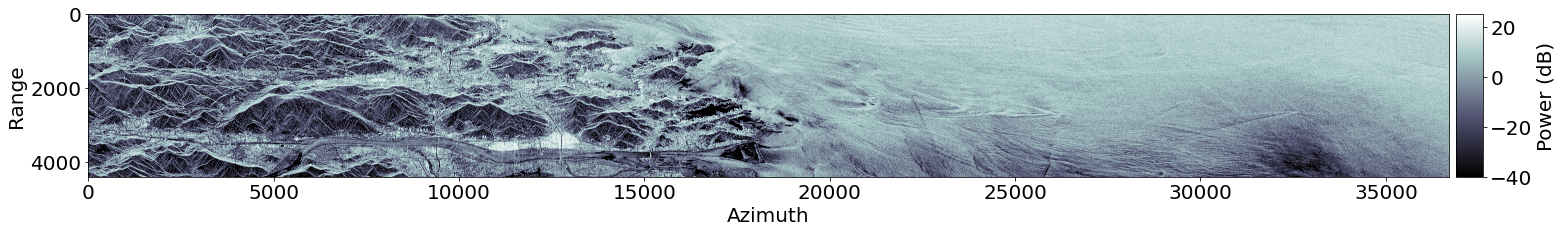

In [17]:
# Plotting Full Data

remap_function = Density()
full_data = remap_function(reader[:4388, :36699])
full_data_db = 10 * np.log10(np.clip(full_data, 1e-5, None))  

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(25, 25))

ll = axs.imshow(full_data_db, cmap='bone', vmin=-40, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'

divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.1)  
cbar = pyplot.colorbar(ll, cax=cax)
cbar.set_label('Power (dB)',fontsize = 20) 

axs.set_xlabel('Azimuth', fontsize = 20)
axs.set_ylabel('Range', fontsize = 20)

#pyplot.title("SAR Image filtered - Busan, South Korea", fontsize=15, loc='left')
pyplot.rc('ytick', labelsize=20)
pyplot.rc('xtick', labelsize=20)

# Show the plot
pyplot.show()

In [5]:
data_raw=reader[:4388, :36699]
#rows, cols = data_raw.shape
fft_data = np.fft.fft(data_raw, axis=0)
fft_shifted = np.fft.fftshift(fft_data, axes=0)
#hann_window = np.hanning(1000)
#hann_window = np.hanning(rows).reshape(-1, 1)  # Reshape to apply along rows
hann_window = np.hanning(2900)
zero_pad=np.zeros(744)
hann_window = np.concatenate((zero_pad, hann_window, zero_pad))
hann_window=hann_window.reshape(-1, 1)

In [6]:
fft_windowed = fft_shifted * hann_window

In [41]:
fft_windowed[2000,10000]

(79.01390815044732-8.436458009779063j)

In [7]:
ifft_shifted = np.fft.ifftshift(fft_windowed, axes=0)  # Shift back

In [8]:
ifft_data = np.fft.ifft(ifft_shifted, axis=0)  # Compute IFFT
reconstructed_data = remap_function(ifft_data)
    
reconstructed_data_db = 10 * np.log10(np.clip(np.abs(reconstructed_data), 1e-5, None))

In [28]:
reconstructed_data_db = 10 * np.log10(np.clip(np.abs(reconstructed_data), 1e-7, None))

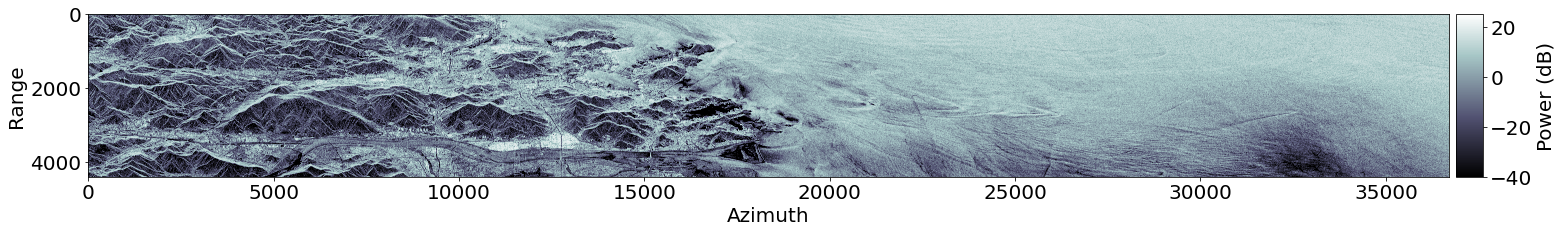

In [16]:
fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(25, 25))
ll = axs.imshow(reconstructed_data_db, cmap='bone', vmin=-40, vmax=25)

# Colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = pyplot.colorbar(ll, cax=cax)
cbar.set_label('Power (dB)',fontsize = 20) 

axs.set_xlabel('Azimuth', fontsize = 20)
axs.set_ylabel('Range', fontsize = 20)

#pyplot.title("SAR Image filtered - Busan, South Korea", fontsize=15, loc='left')
pyplot.rc('ytick', labelsize=20)
pyplot.rc('xtick', labelsize=20)

# Show the plot
pyplot.show()

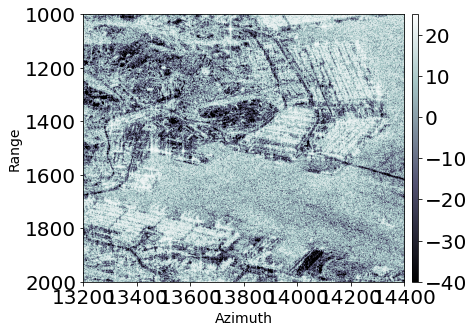

In [19]:
fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))

ll = axs.imshow(full_data_db, cmap='bone', vmin=-40, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'

divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.1)  
cbar = pyplot.colorbar(ll, cax=cax)
#cbar.set_label('Power') 
axs.set_ylim(2000, 1000)  
axs.set_xlim(13200, 14400)
axs.set_xlabel('Azimuth', fontsize = 14)
axs.set_ylabel('Range', fontsize = 14)
pyplot.rc('ytick', labelsize=14)
pyplot.rc('xtick', labelsize=14)

pyplot.show()


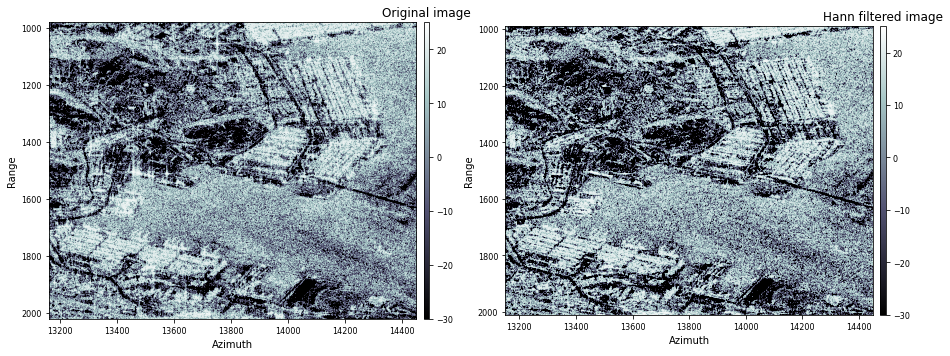

In [30]:
full_data_db = 10 * np.log10(np.clip(full_data, 1e-7, None))  
reconstructed_data_db = 10 * np.log10(np.clip(np.abs(reconstructed_data), 1e-7, None))
fig, axs = pyplot.subplots(nrows=1, ncols=2, figsize=(15, 10))

f1 = axs[0].imshow(full_data_db, cmap='bone',vmin=-30, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="1.5%", pad=0.1)  
cbar1 = pyplot.colorbar(f1, cax=cax1)
#cbar1.set_label('Power')  # Optional: Add label to colorbar
axs[0].set_ylim(2020, 980)  
axs[0].set_xlim(13160, 14450)
axs[0].set_xlabel('Azimuth')
axs[0].set_ylabel('Range')
pyplot.title('Original image')
pyplot.rc('ytick', labelsize=8)
pyplot.rc('xtick', labelsize=8)

f2 = axs[1].imshow(reconstructed_data_db, cmap='bone',vmin=-30, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="1.5%", pad=0.1)  
cbar2 = pyplot.colorbar(f2, cax=cax2)
#cbar2.set_label('Power')  # Optional: Add label to colorbar
axs[1].set_ylim(2010, 990)  
axs[1].set_xlim(13150, 14450)
axs[1].set_xlabel('Azimuth')
axs[1].set_ylabel('Range')
pyplot.title('Hann filtered image')

 
pyplot.show()

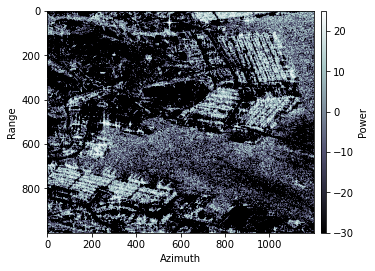

In [42]:
remap_function = Density()
data = remap_function(slc[1000:2000, 13200:14400])

data_db = 10 * np.log10(np.clip(data, 1e-10, None))  

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(5, 5))

ll = axs.imshow(data_db, cmap='bone', vmin=-30, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'

divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.1)  
cbar = pyplot.colorbar(ll, cax=cax)
cbar.set_label('Power')  
#axs.set_xlim(1000, 2000)  
#axs.set_ylim(13200, 14400)
axs.set_xlabel('Azimuth')
axs.set_ylabel('Range')
pyplot.show()


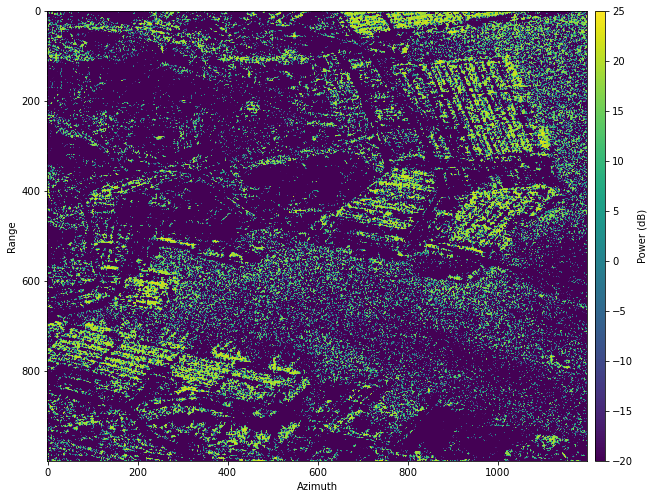

In [9]:
data_raw=slc[1000:2000, 13200:14400]
rows, cols = data_raw.shape
fft_data = np.fft.fft(data_raw, axis=0)
fft_shifted = np.fft.fftshift(fft_data, axes=0)
#hann_window = np.hanning(1000)
hann_window = np.hanning(rows).reshape(-1, 1)  # Reshape to apply along rows
fft_windowed = fft_shifted * hann_window

# Apply Inverse FFT (bring back the original image)
ifft_shifted = np.fft.ifftshift(fft_windowed, axes=0)  # Shift back
reconstructed_data = np.fft.ifft(ifft_shifted, axis=0)  # Compute IFFT
ifft_data = remap_function(reconstructed_data)

ifft_data_db = 10 * np.log10(np.clip(np.abs(ifft_data), 1e-20, None))

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(10, 10))
ll = axs.imshow(ifft_data_db, cmap='viridis', vmin=-20, vmax=25)

# Adjust colorbar height to match figure height
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = pyplot.colorbar(ll, cax=cax)
cbar.set_label('Power (dB)')  # Optional: Add label

# Axis labels
axs.set_xlabel('Azimuth')
axs.set_ylabel('Range')

# Show the plot
pyplot.show()

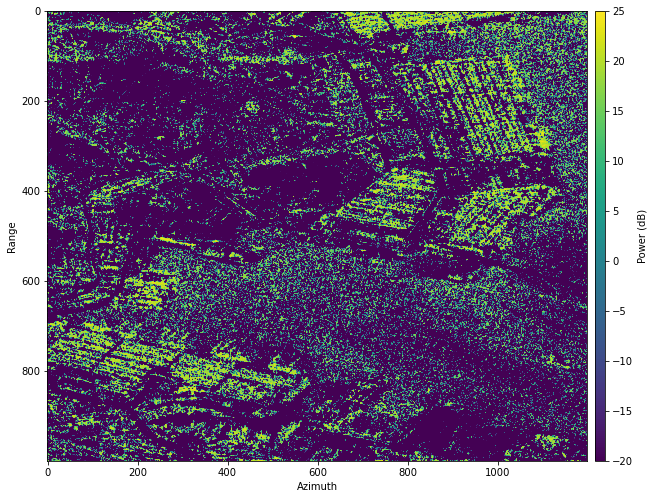

In [25]:



data_raw=slc[1000:2000, 13200:14400]
rows, cols = data_raw.shape
fft_data = np.fft.fft(data_raw, axis=0)
fft_shifted = np.fft.fftshift(fft_data, axes=0)
#hann_window = np.hanning(1000)
#hann_window = np.hanning(rows).reshape(-1, 1)  # Reshape to apply along rows
hann_window = np.hanning(800)
zero_pad=np.zeros(100)
hann_window = np.concatenate((zero_pad, hann_window, zero_pad))
hann_window=hann_window.reshape(-1, 1)

fft_windowed = fft_shifted * hann_window

# Apply Inverse FFT (bring back the original image)
ifft_shifted = np.fft.ifftshift(fft_windowed, axes=0)  # Shift back
reconstructed_data = np.fft.ifft(ifft_shifted, axis=0)  # Compute IFFT
ifft_data = remap_function(reconstructed_data)

ifft_data_db = 10 * np.log10(np.clip(np.abs(ifft_data), 1e-20, None))

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(10, 10))
ll = axs.imshow(ifft_data_db, cmap='viridis', vmin=-20, vmax=25)

# Adjust colorbar height to match figure height
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = pyplot.colorbar(ll, cax=cax)
cbar.set_label('Power (dB)')  # Optional: Add label

# Axis labels
axs.set_xlabel('Azimuth')
axs.set_ylabel('Range')

# Show the plot
pyplot.show()

In [5]:
hann_window = np.hanning(800)
hann_window = np.concatenate((zero_pad, hann_window, zero_pad))
#hann_window = np.transpose(hann_window)

#fft_windowed = fft_shifted * hann_window
#hann_window = np.hanning(rows).reshape(-1, 1)
hann_window=hann_window.reshape(-1, 1)
hann_window.shape

NameError: name 'np' is not defined

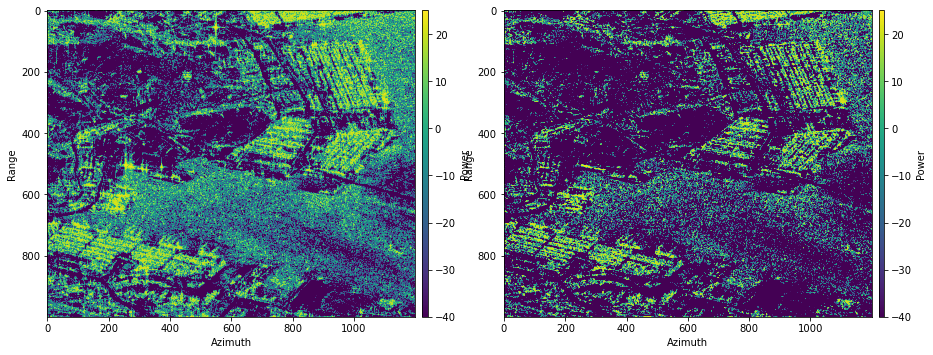

In [26]:
 fig, axs = pyplot.subplots(nrows=1, ncols=2, figsize=(15, 10))

f1 = axs[0].imshow(data_db, cmap='bone', vmin=-40, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="1.5%", pad=0.1)  
cbar1 = pyplot.colorbar(f1, cax=cax1)
cbar1.set_label('Power')  # Optional: Add label to colorbar
axs[0].set_xlabel('Azimuth')
axs[0].set_ylabel('Range')

f2 = axs[1].imshow(ifft_data_db, cmap='bone', vmin=-40, vmax=25)  # 'gray', 'binary','bone','viridis', 'plasma', 'inferno', 'magma', 'cividis'
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="1.5%", pad=0.1)  
cbar2 = pyplot.colorbar(f2, cax=cax2)
cbar2.set_label('Power')  # Optional: Add label to colorbar
axs[1].set_xlabel('Azimuth')
axs[1].set_ylabel('Range')

 
pyplot.show()